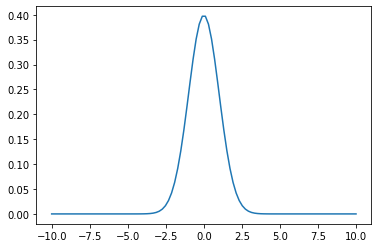

In [2]:
from basic_quantile_pdf import LeftTail, RightTail, IntervalFunction
from vect_interpolation import VectorizeQuantileInterpolation
import numpy as np 
from scipy.stats import norm , lognorm
import matplotlib.pyplot as plt

xtest = np.linspace(-10, 10, 100)
pdf = norm.pdf(xtest, 0., 1.)
plt.plot(xtest, pdf)
plt.show()

In [3]:
x = np.array([-0.7, 0., 0.7])
tau = norm.cdf(x, 0., 1.)
f = norm.pdf(x, 0., 1.)
tau

array([0.24196365, 0.5       , 0.75803635])

In [4]:
left = LeftTail(x[0], f[0], tau[0])
right = RightTail(x[-1], f[-1], tau[-1])
interval_1 = IntervalFunction(x[0:2], f[0:2], tau[0:2])
interval_2 = IntervalFunction(x[1:3], f[1:3], tau[1:3])

In [5]:
def quantile_interpolation(xtest): 
    if xtest < x[0]: 
        return left(xtest)
    elif xtest < x[1] and xtest > x[0]:
        return interval_1(xtest)
    elif xtest < x[2] and xtest > x[1]:
        return interval_2(xtest)
    else: 
        return right(xtest)

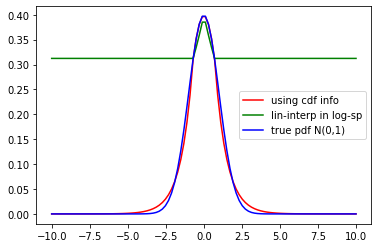

In [6]:
pdf_approx = [quantile_interpolation(xi) for xi in xtest]
pdf_interp = np.exp(np.interp(xtest, x, np.log(f)))
plt.plot(xtest, pdf_approx, 'r', label='using cdf info')
plt.plot(xtest, pdf_interp, 'g', label='lin-interp in log-sp')
plt.plot(xtest, pdf, 'b', label='true pdf N(0,1)')
plt.legend()

### Interpolation using quantile information respects areas

In [7]:
print(f"Area under a gaussian pdf is always {np.trapz(pdf, xtest)}")
print(f"Area under pdf interpolation using quantile information is also {np.trapz(pdf_approx, xtest)[0]}")
print(f"Area under pdf linear interpolation is {np.trapz(pdf_interp, xtest)} instead of 1")

Area under a gaussian pdf is always 1.0
Area under pdf interpolation using quantile information is also 1.0008246907527554
Area under pdf linear interpolation is 6.302219302042004 instead of 1


### In log-space the approximations look like

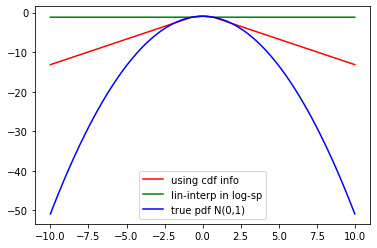

In [8]:
pdf_approx = np.vstack([quantile_interpolation(xi) for xi in xtest])
pdf_interp = np.exp(np.interp(xtest, x, np.log(f)))
plt.plot(xtest, np.log(pdf_approx), 'r', label='using cdf info')
plt.plot(xtest, np.log(pdf_interp), 'g', label='lin-interp in log-sp')
plt.plot(xtest, np.log(pdf), 'b', label='true pdf N(0,1)')
plt.legend()

### And the derivative wrt x

In [9]:
def custom_interpolate(x,f, tau, xnew):
    quant_interp = VectorizeQuantileInterpolation(x, f, tau)
    return quant_interp(xnew),  quant_interp.grads(xnew)

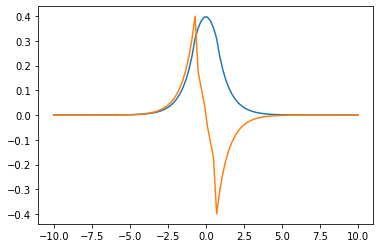

In [10]:
plt.plot(xtest, custom_interpolate(x,f, tau, xtest)[0])
plt.plot(xtest, custom_interpolate(x,f, tau, xtest)[1])

### Compare times

In [11]:
%timeit custom_interpolate(x,f, tau, xtest)

220 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit np.exp(np.interp(xtest, x, np.log(f)))

4.1 µs ± 302 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Log-normal distribution
Selecting 10 support points with quantile tau > 0

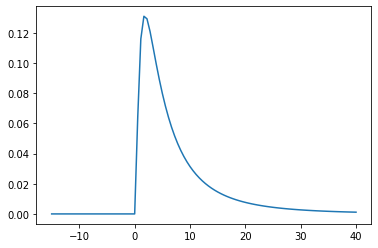

In [13]:
xtest = np.linspace(-15, 40, 100)
pdf = lognorm.pdf(xtest, 1., 0, 5)
plt.plot(xtest, pdf)
plt.show()

In [14]:
x = np.linspace(0.01, 40, 10)
tau = lognorm.cdf(x, 1., 0, 5)
f = lognorm.pdf(x, 1., 0, 5)
tau

array([2.57264515e-10, 4.53911456e-01, 7.17773096e-01, 8.36784768e-01,
       8.97748039e-01, 9.32131400e-01, 9.52944666e-01, 9.66240120e-01,
       9.75100692e-01, 9.81211607e-01])

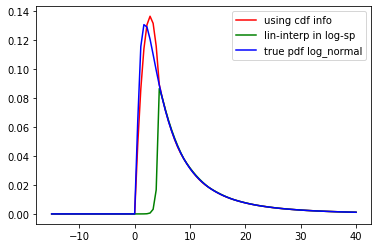

In [15]:
pdf_interp = np.exp(np.interp(xtest, x, np.log(f)))
plt.plot(xtest, custom_interpolate(x,f, tau, xtest)[0], 'r', label='using cdf info')
plt.plot(xtest, pdf_interp, 'g', label='lin-interp in log-sp')
plt.plot(xtest, pdf, 'b', label='true pdf log_normal')
plt.legend()
plt.show()
